# Lab 3: Multivariate Methods

## Parameter Estimation
Let $𝑋={𝑋_1,…,𝑋_𝑃}$ be a $p$-dimension point. The mean vector is $\mu=𝐸(𝑋)$ and the covariance matrix is $Σ_{𝑝×𝑝}$

### Two normal distributions with different mean and covariance matrix

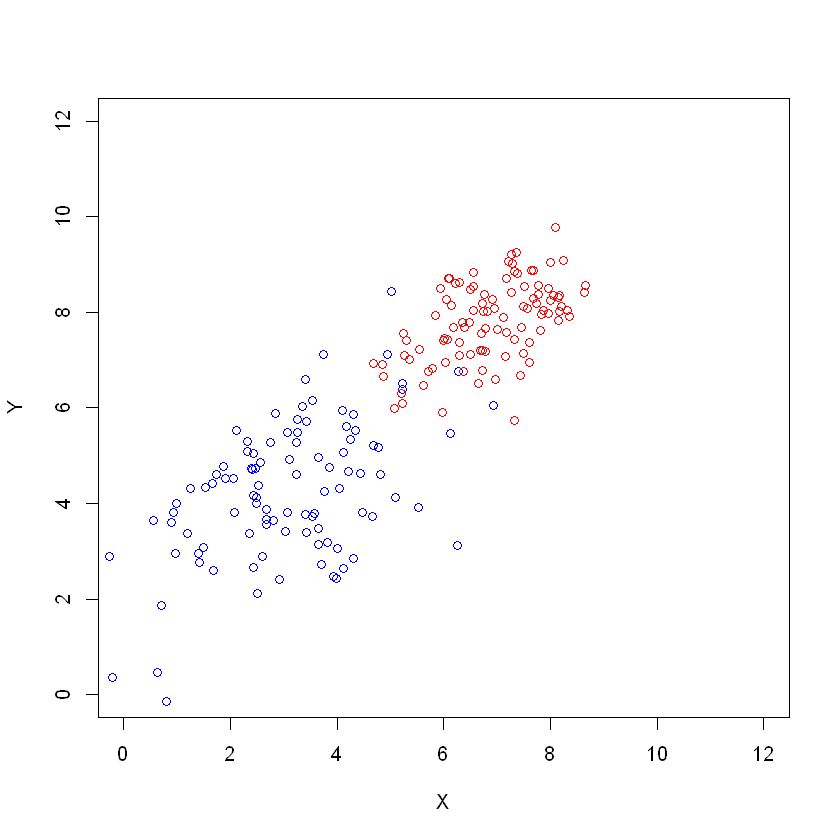

In [1]:
library(MASS)
sigma1 = matrix(2,2,2)
sigma1[1,2] = sigma1[2,1]=0.5
bvn1 = mvrnorm(100, mu=c(3,4), Sigma=sigma1)

sigma2 = matrix(1,2,2)
sigma2[1,2] = sigma2[2,1] = 0.5
bvn2 = mvrnorm(100, mu=c(7,8), Sigma=sigma2)

plot(bvn1,xlim=c(0,12),ylim=c(0,12),col="blue",xlab="X",ylab="Y")
points(bvn2,col="red")

The mean vector $\mu$ can be estimated by the sample average

In [2]:
bvn1_average = apply(bvn1,2,mean)
bvn2_average = apply(bvn2,2,mean)
print("the first group")
bvn1_average
print("the second group")
bvn2_average

[1] "the first group"


[1] 3.054318 4.255141

[1] "the second group"


[1] 6.866984 7.814675

The covariance matrix can be estimated by the sample covariance matrix

In [3]:
bvn1_cov = cov(bvn1)
bvn2_cov = cov(bvn2)

print("the first group")
bvn1_cov
print("the second group")
bvn2_cov

[1] "the first group"


2.219239,1.059169
1.059169,2.066599


[1] "the second group"


0.9122746,0.4151963
0.4151963,0.6923675


### Two classes may have a common covaraince matrix

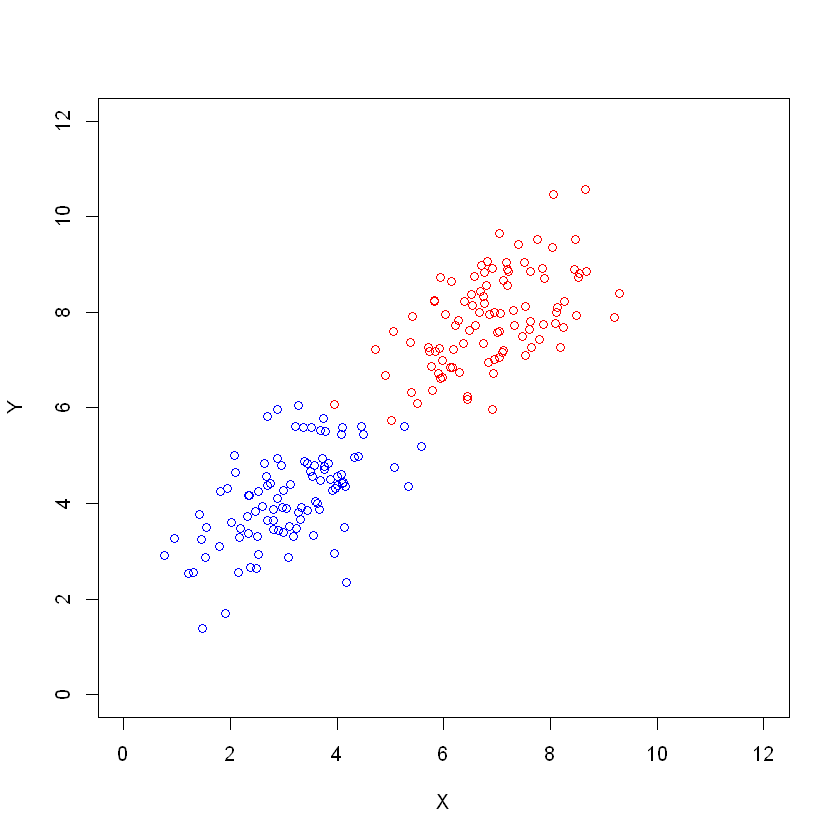

In [4]:
sigma = matrix(1,2,2)
sigma[1,2] = sigma[2,1]=0.5

bvn1 = mvrnorm(100, mu=c(3,4), sigma)
bvn2 = mvrnorm(100, mu=c(7,8), sigma)

plot(bvn1,xlim=c(0,12),ylim=c(0,12),col="blue",xlab="X",ylab="Y")
points(bvn2,col="red")

The covariance matrix is estimated by the sample covariance of the pooled data

In [5]:
pooldata = rbind(bvn1-mean(bvn1),bvn2-mean(bvn2))
bvn1_cov = cov(pooldata)

print("The pooled covariance matrix")
bvn1_cov

[1] "The pooled covariance matrix"


0.9970046,0.5282245
0.5282245,0.9340862


### Diagnal covariance matrix
In this case, the coordinate random variables $X_1,...X_p$ are independently distributed with a normal distribution

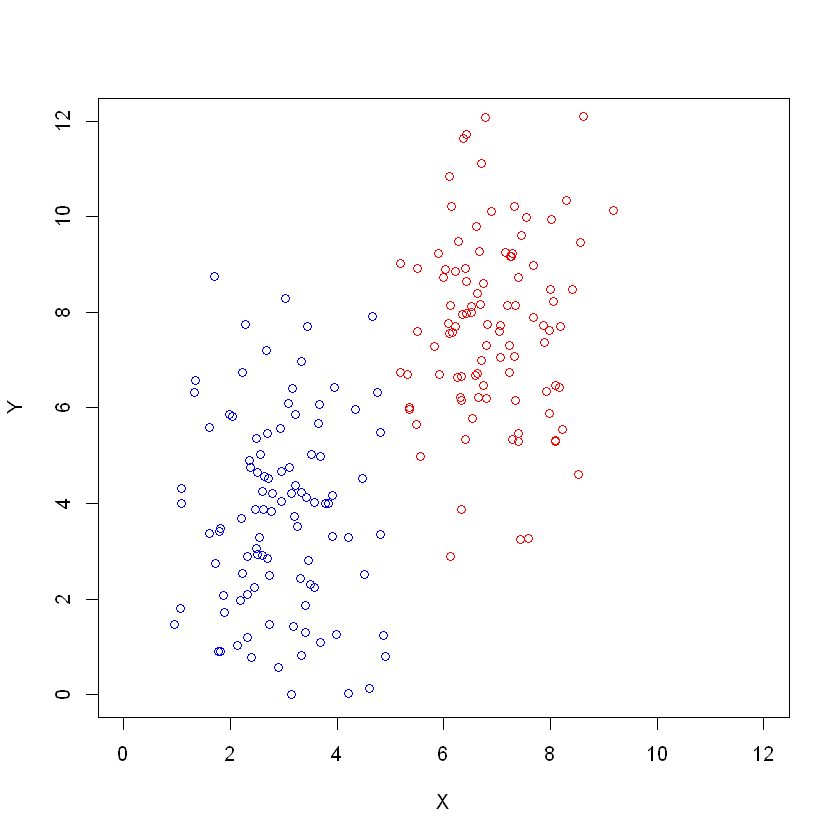

In [6]:
sigma = matrix(1,2,2)
sigma[1,2] = sigma[2,1]= 0
sigma[2,2] = 4

bvn1 = mvrnorm(100, mu=c(3,4), sigma)
bvn2 = mvrnorm(100, mu=c(7,8), sigma)

plot(bvn1,xlim=c(0,12),ylim=c(0,12),col="blue",xlab="X",ylab="Y")
points(bvn2,col="red")

### Independent random variables with a common variance

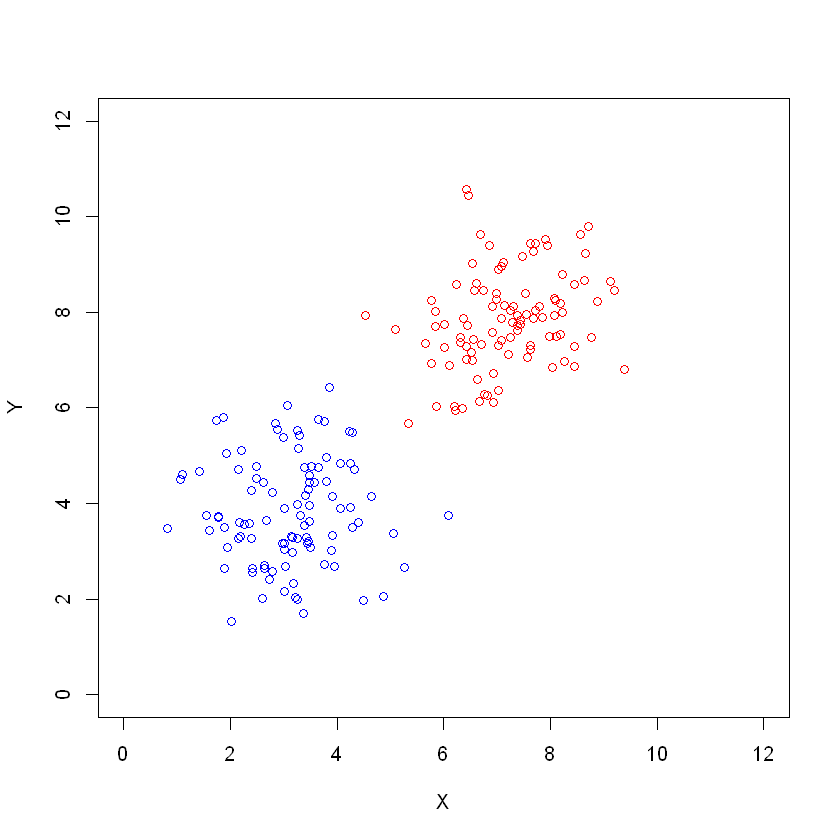

In [7]:
sigma = matrix(1,2,2)
sigma[1,2] = sigma[2,1]= 0

bvn1 = mvrnorm(100, mu=c(3,4), sigma)
bvn2 = mvrnorm(100, mu=c(7,8), sigma)

plot(bvn1,xlim=c(0,12),ylim=c(0,12),col="blue",xlab="X",ylab="Y")
points(bvn2,col="red")

## Estimation of Missing Values
Values of certain variables may be missing in data. For example, the first 10 values of the first column of bvn1 are missing

In [8]:
bvn1[1:10,1] = NA
bvn1

NA,2.647569
NA,3.968865
NA,5.810146
NA,6.050118
NA,3.894567
NA,5.387743
NA,3.982590
NA,5.752607
NA,4.750854
NA,3.716143
3.790503,4.970875


We fill in the missing entries by estimating them, i.e., imputation. In the main imputation, missing values are replaced by the average of the available data

In [9]:
bvn1[1:10,1] = mean(bvn1[,1],na.rm=T)
bvn1[1:10,1]

[1] 3.122265 3.122265 3.122265 3.122265 3.122265 3.122265 3.122265 3.122265
 [9] 3.122265 3.122265

In imputation by regression, missing values are predicted by linear regression

In [10]:
x = bvn1[-(1:10),]
reg = lm(x[,1]~x[,2])
bvn1[1:10,] = reg$coef[1]+bvn1[1:10,2]*reg$coef[2]
bvn1[1:10,1]

[1] 3.128018 3.121107 3.111477 3.110222 3.121496 3.113686 3.121035 3.111778
 [9] 3.117017 3.122429

## Multivariate Classification

Let $\{C_i: i=1,...,k\}$ be the $k$ classes. The points in the class $C_i$ follow the multivariate normal distribution with mean vector $\mu_i$ and covariance matrix $\Sigma_i$. 
 
Given the training data $X_i$ in class $C_i$, the mean vector and covariance matrix can be estimated by the sample average $\bar{X}_i$ and sample covariance matrix $S_i$

In [11]:
sigma1 = matrix(2,2,2)
sigma1[1,2] = sigma1[2,1]=0.5
bvn1 = mvrnorm(100, mu=c(3,4), Sigma=sigma1)

sigma2 = matrix(1,2,2)
sigma2[1,2] = sigma2[2,1] = 0.5
bvn2 = mvrnorm(100, mu=c(7,8), Sigma=sigma2)

bvn1_average = apply(bvn1,2,mean)
bvn2_average = apply(bvn2,2,mean)

bvn1_cov = cov(bvn1)
bvn2_cov = cov(bvn2)

Let $P(C_i): i=1,...k$ be the prior probabilities of the k classes. Given the training data $X$, the probablity $P(C_i)$ can be estimated by the proportion of points in the class $C_i$

The Bayes classifier is given by the posterior probability $g_i(x) = logf(x|C_i) + log(C_i)$. We substitute the mean vector, covariance matrix, and prior probabilties with their estimates. The posterior probability of the class $C_i$ is 

$$g_i(x) = -\frac{1}{2}(x-\bar{X}_i)^TS_i^{-1}(x-\bar{X}_i)+\hat{P}(C_i)$$

The Bayes classification is that $x\in C_i$ if $g_i(x) > g_j(x)$ for $i,j = 1,...,k$ and $j\ne i$

In [12]:
x = rbind(bvn1,bvn2)
g1 = -0.5*diag((x-bvn1_average)%*%solve(bvn1_cov)%*%t(x-bvn1_average))+0.5
g2 = -0.5*diag((x-bvn2_average)%*%solve(bvn2_cov)%*%t(x-bvn2_average))+0.5
print("first class")
which(g1>g2)
print("second class")
which(g1<g2)

print("two misclassified points")
x[which(g1[101:200]>g2[101:200]),]

[1] "first class"


[1]   1   2   3   4   5   6   7   8   9  10  12  13  14  15  16  17  18  19
 [19]  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
 [37]  38  39  40  41  42  44  45  46  47  48  49  50  51  52  53  54  55  56
 [55]  57  58  59  60  61  62  64  65  66  67  68  69  70  71  72  73  74  75
 [73]  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
 [91]  94  95  96  97  98  99 100 128 138 156 158 175 176 192

[1] "second class"


[1]  11  43  63 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
[20] 117 118 119 120 121 122 123 124 125 126 127 129 130 131 132 133 134 135 136
[39] 137 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 157
[58] 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 177 178 179
[77] 180 181 182 183 184 185 186 187 188 189 190 191 193 194 195 196 197 198 199
[96] 200

[1] "two misclassified points"


4.7164704,4.336657
0.3602431,1.753896
0.7300312,4.567222
1.4225923,2.991536
3.1823288,5.473485
2.8805127,2.947290
2.7882018,1.768957


### Two classes have a common covariance matrix


If two classes have a common covariance matrix $S$, the posterior probability of the class $C_i$ is

$$g_i(x) = -\frac{1}{2}(x-\bar{X}_i)^TS^{-1}(x-\bar{X}_i)+\hat{P}(C_i)$$

When $g_i(x)$ is compared with $g_j(x)$, the quadratic term $x^TS^{-1}x$ cancels because it is common in all posterior probabilities of classes. Thus, it becomes a linear discriminant

$$g_i(x) = \bar{X}_i^TS^{-1}x -\frac{1}{2}\bar{X}_i^TS^{-1}\bar{X}_i + \hat{P}(C_i)$$

The Bayes classification is that $x\in C_i$ if $g_i(x) > g_j(x)$ for $i,j = 1,...,k$ and $j\ne i$

In [13]:
pooldata = rbind(bvn1-mean(bvn1),bvn2-mean(bvn2))
bvn1_cov = bvn2_cov = cov(pooldata)

m1 = 0.5*bvn1_average%*%solve(bvn1_cov)%*%bvn1_average
m2 = 0.5*bvn2_average%*%solve(bvn1_cov)%*%bvn2_average

x = rbind(bvn1,bvn2)
g1 = bvn1_average%*%solve(bvn1_cov)%*%t(x) - c(m1,m1) + 0.5
g2 = bvn2_average%*%solve(bvn2_cov)%*%t(x) - c(m2,m2) + 0.5
print("first class")
which(g1>g2)
print("second class")
which(g1<g2)

print("two misclassified points")
x[which(g1[101:200]>g2[101:200]),]

[1] "first class"


[1]   1   2   3   4   5   6   7   8   9  10  12  13  14  15  16  17  18  19  20
[20]  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
[39]  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
[58]  59  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
[77]  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
[96]  98  99 100 175

[1] "second class"


[1]  11  60 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 [19] 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 [37] 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 [55] 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 [73] 171 172 173 174 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 [91] 190 191 192 193 194 195 196 197 198 199 200

[1] "two misclassified points"


[1] 3.182329 5.473485

### Regularized discriminant analysis


Let $S_i$ be the sample covaraince matrix for class $i$ and let $S$ be the covariance matrix of the pool data. The covariance matrix is written as a weighted average of the three special cases

$$w(\lambda) = \lambda S + (1-\lambda) S_i$$
$$v(\lambda,\gamma) = (1-\gamma)w(\lambda) + \gamma\frac{1}{p}tr(w(\lambda))I$$

When $\lambda=\gamma=0$, it is a quadratic classifier. 

When $\lambda=1$ and $\gamma=0$, it is a linear classifier. 

When $\lambda=0$ and $\gamma=1$, the covariance matrices are diagonal with $\sigma^2$ and it is the nearest mean classifier. 

When $\lambda=1$ and $\gamma=1$, the covariance matrices are diagonal with the same variance. 

The choice of $\lambda$ and $\gamma$ can be optimized by cross-validation

In [14]:
library(mlbench)
library(caret)
library(glmnet)
library(klaR)

data(Sonar)
Sonar

Loading required package: ggplot2



Loading required package: lattice



Loading required package: Matrix



Loaded glmnet 4.1-6



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,⋯,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
2,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,⋯,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
3,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,⋯,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
4,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,⋯,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
5,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,⋯,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
6,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,⋯,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
7,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,⋯,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
8,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,⋯,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
9,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,⋯,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R


Regularized Discriminant Analysis

Regularized Discriminant Analysis 

208 samples
 60 predictor
  2 classes: 'M', 'R' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 167, 166, 166, 167, 166 
Resampling results across tuning parameters:

  gamma  lambda  Accuracy   Kappa    
  0.0    0.0     0.6977933  0.3791172
  0.0    0.5     0.7644599  0.5259800
  0.0    1.0     0.7310105  0.4577198
  0.5    0.0     0.7885017  0.5730052
  0.5    0.5     0.8271777  0.6502693
  0.5    1.0     0.7988386  0.5939209
  1.0    0.0     0.6732869  0.3418352
  1.0    0.5     0.6780488  0.3527778
  1.0    1.0     0.6825784  0.3631626

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were gamma = 0.5 and lambda = 0.5.

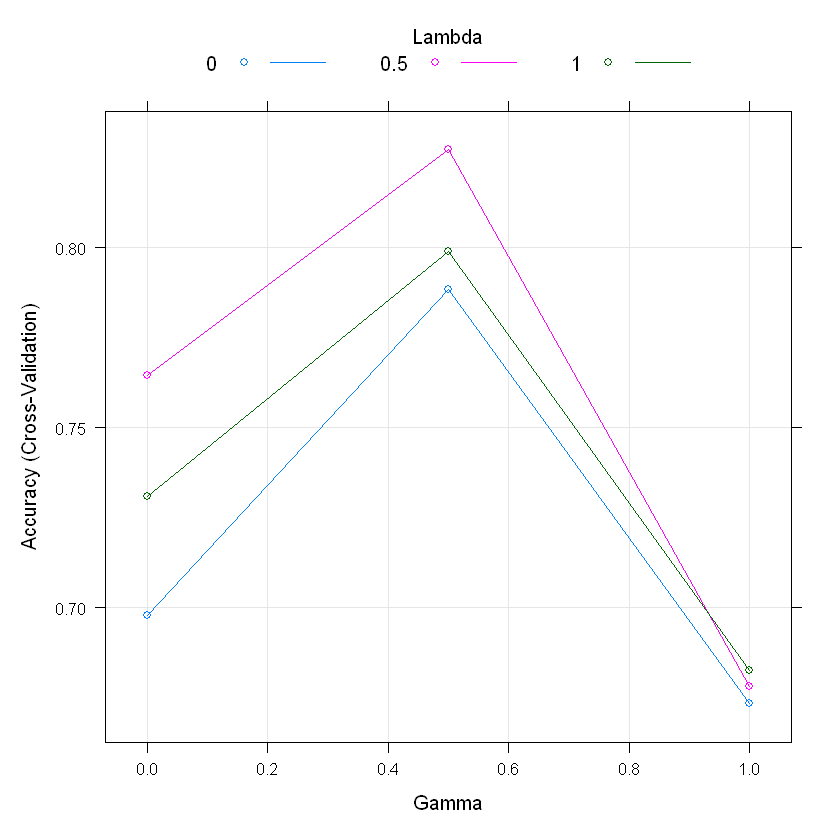

In [15]:
set.seed(1337)
cv_5_grid = trainControl(method = "cv", number = 5)

fit_rda_grid = train(Class ~ ., data = Sonar, method = "rda", trControl = cv_5_grid)
fit_rda_grid

plot(fit_rda_grid)